# Least squares for a more difficult case
Here, we will try to predict the age of [abalone](https://en.wikipedia.org/wiki/Abalone) from physical measurements. The data is taken from the
[UCI Machine Learning Repository](https://doi.org/10.24432/C55C7W), and to quote that page, 

> The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

The data we have available contains 4177 samples, and the following information is available:


| name           | description                           | units   |
|:---------------|:--------------------------------------|:--------|
| Sex            | (M)ale, (F)emale, and (I)nfant        |         |
| Length         | Longest shell measurement             | mm      |
| Diameter       | Perpendicular to length               | mm      |
| Height         | With meat in shell                    | mm      |
| Whole_weight   | Whole abalone                         | grams   |
| Shucked_weight | Weight of meat                        | grams   |
| Viscera_weight | Gut weight (after bleeding)           | grams   |
| Shell_weight   | After being dried                     | grams   |
| Rings          | +1.5 gives the age in years           |         |

We will now attempt to predict the age using these variables.

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="ticks", context="notebook", palette="muted")   

In [18]:
data = pd.read_csv("abalone.csv")
data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [19]:
data["age"] = data["rings"] + 1.5
data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [20]:
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


## Initial exploration

Before we start making models, we must have a look at our raw data. We are going to check for missing values, patterns or anomalies.

### Missing values?

Missing values are like "holes" in our data and many methods can not be applied if data is missing.

One way to check if there are missing values is to ask pandas to check if
some columns contain one or more [Not a number (NaN)](https://en.wikipedia.org/wiki/NaN):

In [21]:
data.isnull().values.any() 

False

We can also ask pandas to write out how many NaN's there are in each column:

In [22]:
data.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
age               0
dtype: int64

We are lucky! There are no missing numbers and we do not have to deal with the potential problems this may cause. How to deal with missing numbers will be a topic for a later lecture in the course.

### Interesting distributions?

Before we model, we should look at distributions of the variables.

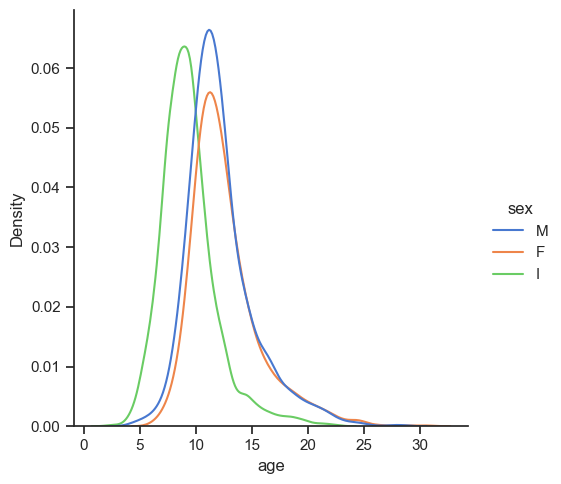

In [23]:
sns.displot(data, x="age", kind="kde", hue="sex")
# test with hue and kind and y

### Scatter plot matrix

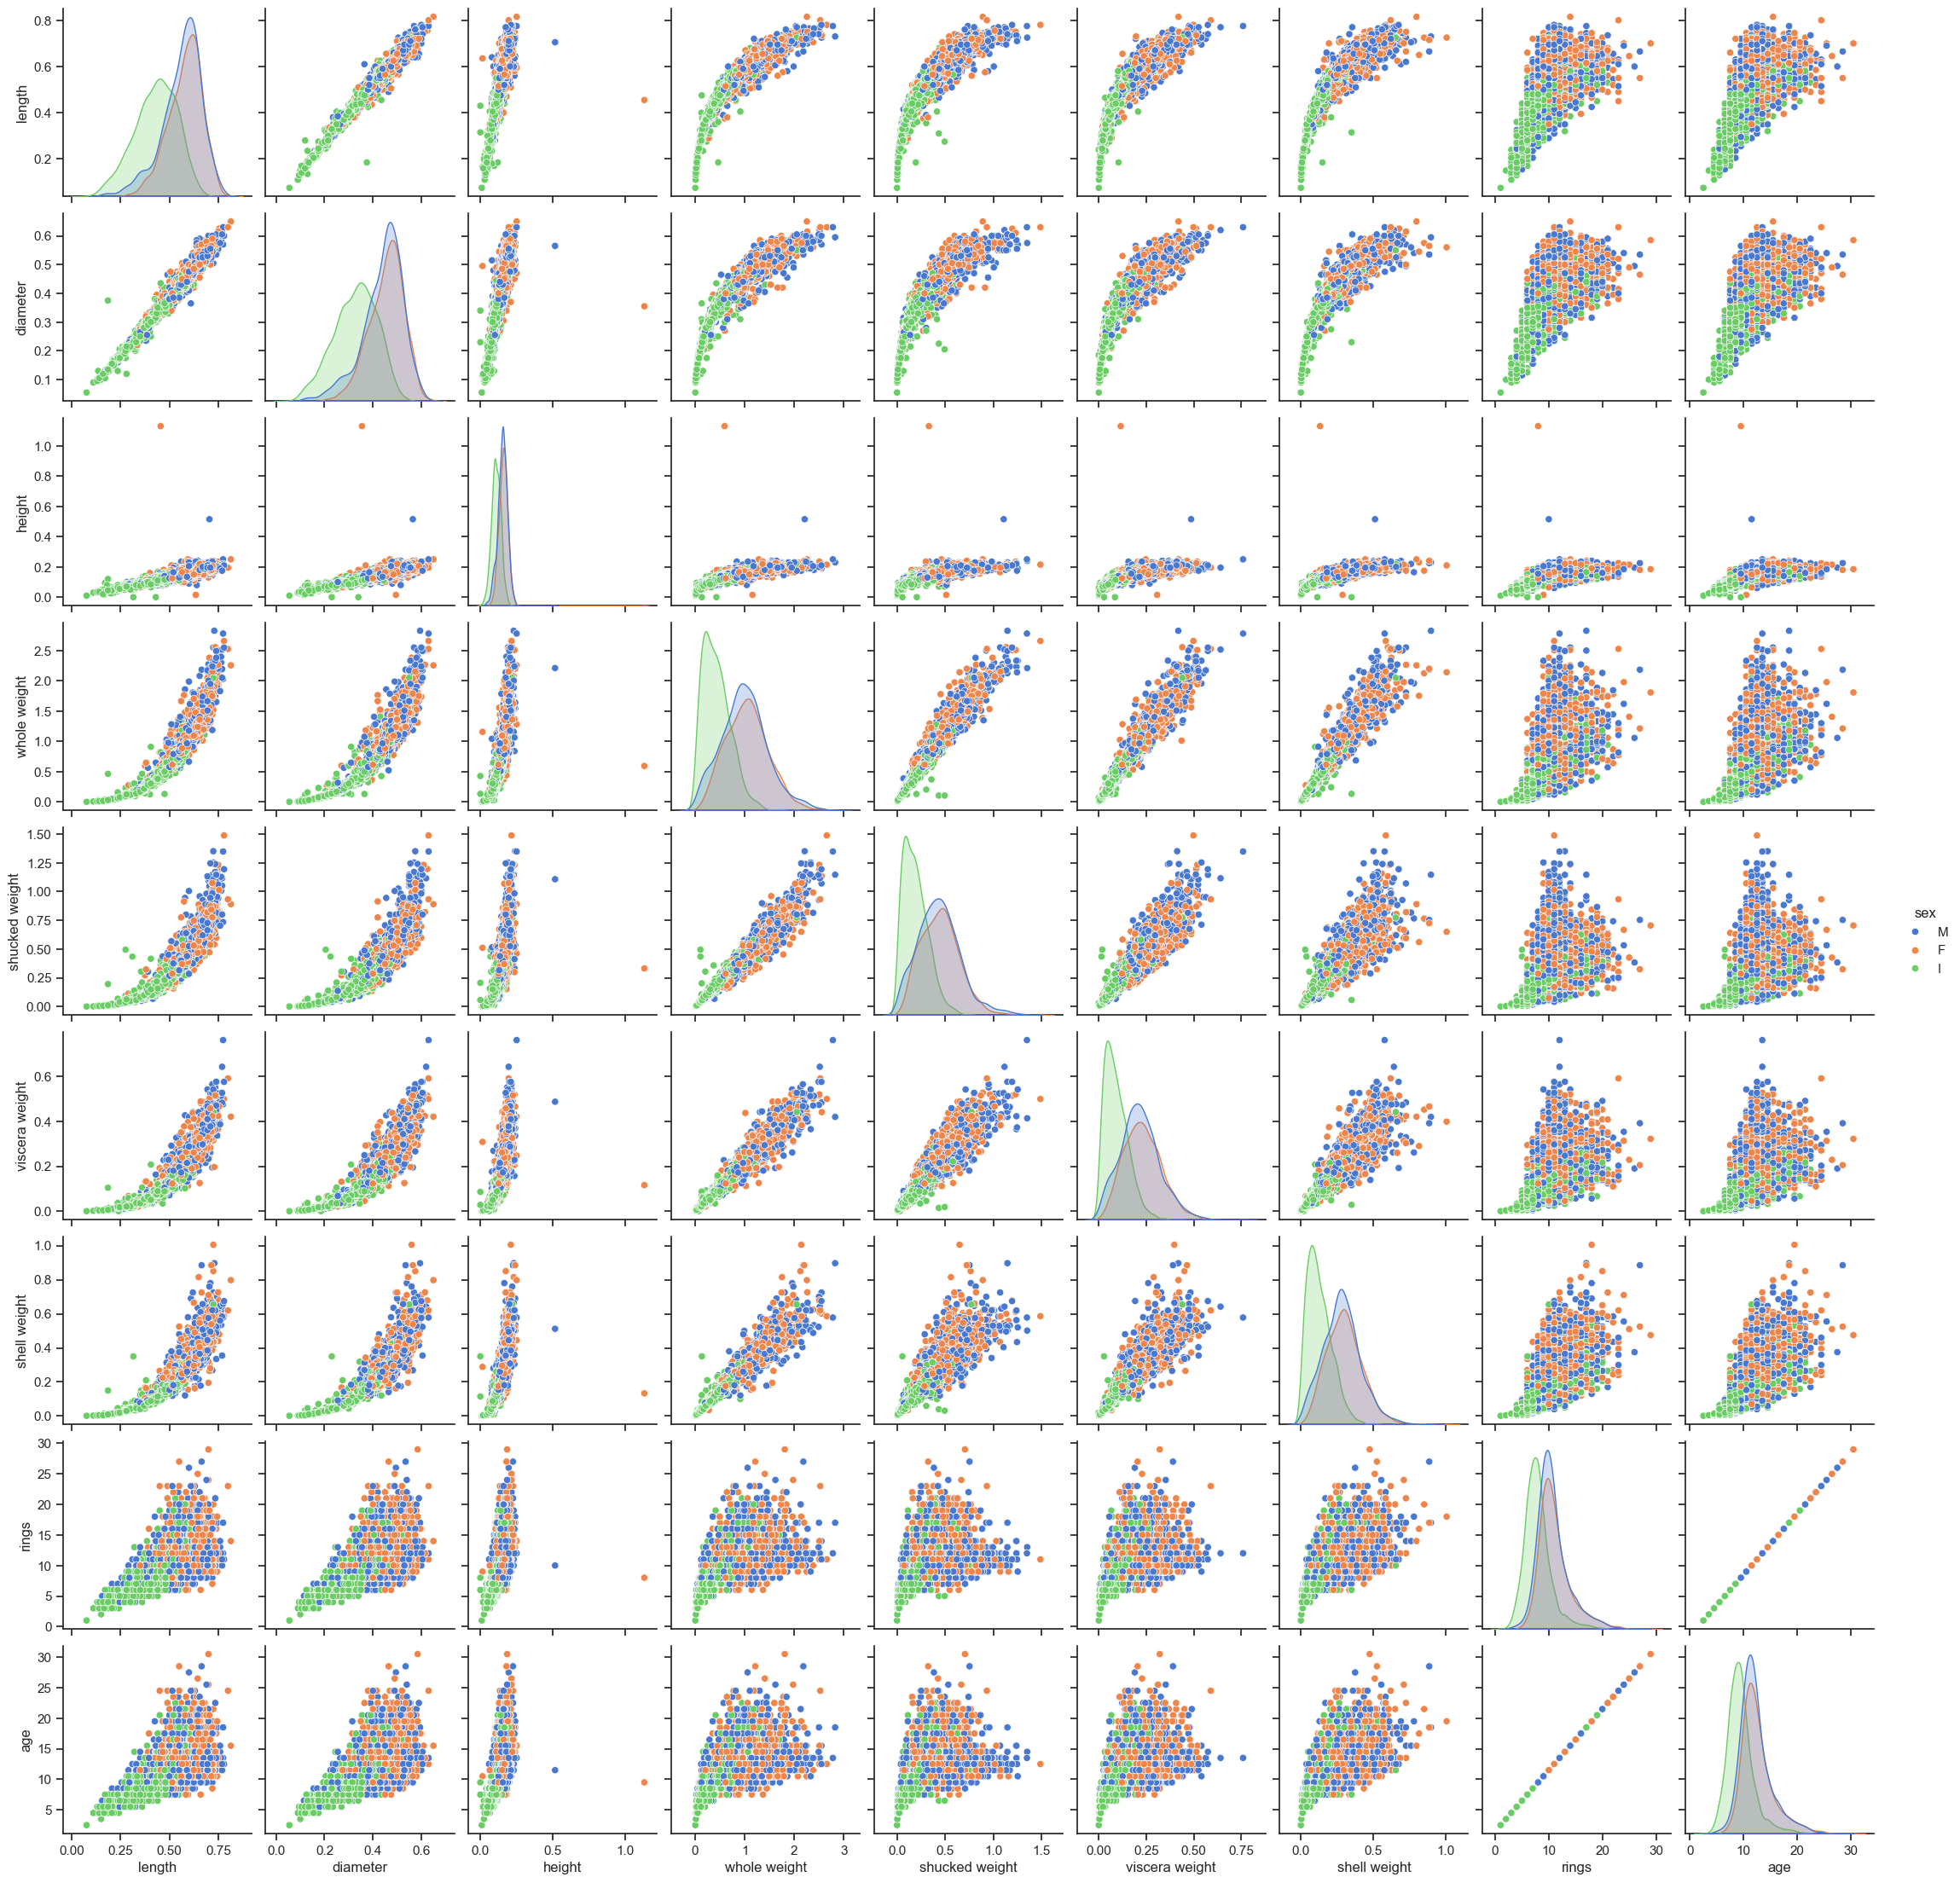

In [24]:
grid = sns.pairplot(data, diag_kind="kde", hue="sex")

### Correlations

The Scatter Plot Matrix can be difficult to read for many variables. We can reduce the plots to just numbers by
calculating correlations between different pairs of variables. We will here use the
[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). This
is a number between -1 and 1 that quantifies the correlation between a pair of variables. Here is a picture
from Wikipedia that shows different situations:

![Pearson correlation coefficient - picture](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/600px-Correlation_coefficient.png)

In [25]:
xvariables = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
]
yvariables = ["age"]

variables = xvariables + yvariables
corr = data[variables].corr()
corr.style.background_gradient(cmap="vlag")

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


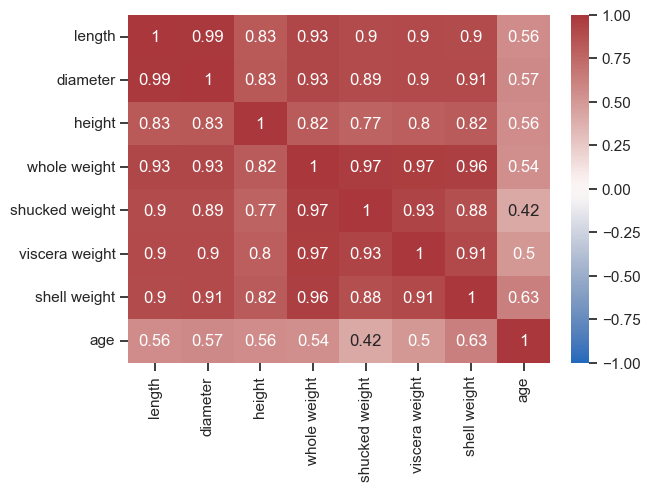

In [26]:
fig, ax = plt.subplots(constrained_layout=True)
sns.heatmap(
    corr,
    cmap="vlag",
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax,
);

## Model 1: Least squares using all variables

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
xvariables = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
]
y = data["age"]
X = data[xvariables]
model1 = LinearRegression(fit_intercept=True)
model1.fit(X, y)
y_hat = model1.predict(X)



In [16]:
score_model(model1, X, y)

NameError: name 'score_model' is not defined

In [ ]:
def show_coefficients(model, variables=None, add_label=True):
    """Display coefficients for a linear model."""
    figi, axi = plt.subplots(constrained_layout=True)
    try:
        coefficients = model.coef_
    except:
        reg = model.named_steps["regression"]
        coefficients = reg.coef_
        # Attempt to generate variable names:
        poly = model.named_steps["polynomial"]
        variables = poly.get_feature_names_out(input_features=variables)

    pos = list(range(len(variables)))
    bars = axi.bar(pos, coefficients)
    if add_label:
        axi.bar_label(bars, fmt="{:.2f}")
    axi.axhline(y=0, ls=":", color="k")
    axi.set_xticks(pos)
    axi.set_xticklabels(variables, rotation=90);

In [ ]:
show_coefficients(model1, variables=xvariables)

### Model 1.1: Does it help changing variables?

In [ ]:
MY_SELECTION = ["length"]
y = data["age"]
X = data[MY_SELECTION]

model11 = LinearRegression(fit_intercept=True)
model11.fit(X, y)

show_coefficients(model11, variables=MY_SELECTION)
score_model(model11, X, y)

### Model 1.2: Does it help focusing on infants?

In [ ]:
data2 = data[data["sex"] == "I"]

y = data2["age"]
X = data2[xvariables]

model12 = LinearRegression(fit_intercept=True)
model12.fit(X, y)
score_model(model12, X, y)

### Model 2: Adding higher order terms
The first linear model are not too impressive. We shall now try to add higher order terms and interactions.
Interactions are terms of the tyoe (as an example) "length × diameter".

In [ ]:
data_modified = data.copy()
data_modified["length * diameter"] = data["length"] * data["diameter"]

xvariables = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
    "length * diameter",
]


X = data_modified[xvariables]
y = data_modified["age"]

model2 = LinearRegression(fit_intercept=True)
model2.fit(X, y)
show_coefficients(model2, variables=xvariables)
score_model(model2, X, y)

One way to add many higher order terms is to use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from sklearn:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
# Add all second order terms and interactions

xvariables = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
]

X = data[xvariables]
y = data["age"]

polynomial = PolynomialFeatures(degree=7, include_bias=False)
steps = [
    ("polynomial", polynomial),
    ("regression", LinearRegression(fit_intercept=True)),
]
model2 = Pipeline(steps=steps)
model2.fit(X, y)
score_model(model2, X, y)
# show_coefficients(model2, variables=xvariables, add_label=False)

## Checking the performance by using a training and test set.
We have certainly added many variables now. But the R² value did not improve that much. When adding variables,
we might overfit our model. One way to check for this is to use a strategy with training and tests sets. The main
idea is: we make our model on one part of the data (the training set), and test it on another (the test set).
The test set is not used when creating the model!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [ ]:
xvariables = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
]


X = scale(data[xvariables])
y = scale(data["age"])

# Note: For scaling, we should fit the scaler to the training set
# and the apply it to the test set. The code above is a
# simplification.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

In [ ]:
def score_train_test(model, X_train, X_test, y_train, y_test):
    """Do some scoring for models made with a test and training set."""
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_predict)
    r2_test = r2_score(y_test, y_test_predict)
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    fig, axes = plt.subplots(
        ncols=2, nrows=2, constrained_layout=True, sharex=True
    )

    axes[0, 0].scatter(y_train_predict, y_train)
    axes[0, 0].set_title(
        f"Training: R² = {r2_train:.3g}, MSE = {mse_train:.3g}"
    )

    axes[0, 1].scatter(y_test_predict, y_test)
    axes[0, 1].set_title(f"Test: R² = {r2_test:.3g}, MSE = {mse_test:.3g}")

    axes[0, 0].set(xlabel="ŷ", ylabel="y")
    axes[0, 1].set(xlabel="ŷ", ylabel="y")

    axes[1, 0].scatter(y_train_predict, y_train - y_train_predict)
    axes[1, 1].scatter(y_test_predict, y_test - y_test_predict)

    axes[1, 0].set(xlabel="ŷ", ylabel="y-ŷ")
    axes[1, 1].set(xlabel="ŷ", ylabel="y-ŷ")

In [ ]:
model1 = LinearRegression(fit_intercept=False)
model1.fit(X_train, y_train)
score_train_test(model1, X_train, X_test, y_train, y_test)

In [ ]:
steps = [
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    ("leastsquares", LinearRegression(fit_intercept=False)),
]
model2 = Pipeline(steps=steps)
model2.fit(X_train, y_train)
score_train_test(model2, X_train, X_test, y_train, y_test)

### Can alternative methods help us?

It can be a lot of work to compare different models and try different selections of variables. Let us
try an alternative, the [least absolute shrinkage and selection operator (LASSO)](https://en.wikipedia.org/wiki/Lasso_(statistics)).
This one modifies the error we minimize. In least squares we minimize the
squared errors,

\begin{equation}
J = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2.
\end{equation}

where $\hat{y}_i = b_0 + b_1 x_1 + \ldots = b_0 + \sum_{j=1}^m b_j x_j$,
while in LASSO, we minimize,

\begin{equation}
J = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^m | b_j | .
\end{equation}

The practical outcome of this is that the minimization penalizes large coefficients and can now find solutions where some $b_j$'s are zero (= not important
for the model!)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

data_p = poly.fit_transform(data[xvariables])


data_poly = pd.DataFrame(
    data_p,
    columns=poly.get_feature_names_out(),
)


X = scale(data[xvariables])
y = scale(data["age"])

print(X.shape)

# Note: For scaling, we should fit the scaler to the training set
# and the apply it to the test set. The code above is a
# simplification.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

In [ ]:
from sklearn.linear_model import Lasso

model3 = Lasso(alpha=0.01, fit_intercept=False, max_iter=10000)
model3.fit(X_train, y_train)
score_train_test(model3, X_train, X_test, y_train, y_test)

In [ ]:
show_coefficients(model3, variables=xvariables, add_label=False)

### Concluding remarks
OK, we do not have super impressive results. Maybe we should try something completely different?

What we have done with the training and test set is completely general. If we try other supervised
learning methods, we can still calculate $R^2$, the mean squared error, and use the training/testing strategy.
Here are some tests for three extra methods:

In [ ]:
from sklearn.svm import SVR  # Support Vector Machine

model5 = SVR()
model5.fit(X_train, y_train)
score_train_test(model5, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.neural_network import MLPRegressor  # A multi-layer Perceptron

model7 = MLPRegressor(
    max_iter=10000,
)
model7.fit(X_train, y_train)
score_train_test(model7, X_train, X_test, y_train, y_test)

In [ ]:
from catboost import CatBoostRegressor

model8 = CatBoostRegressor()
model8.fit(X_train, y_train)
score_train_test(model8, X_train, X_test, y_train, y_test)